##  Student Performance Indices 

### 1) Problem statement<br>
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection<br>
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977<br>
* The data consists of 8 column and 1000 rows.

#### 2.1 Import Data & Required Packages

Importing Pandas, Numpy, Seaborn, Matplotlib & Warning Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
df.shape

(1000, 8)

#### 2.2 Dataset information<br>

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

### 3. Data Checks to perform<br>

* Check missing values
* Check duplicates
* Check the data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories presents in the different categorical column



#### 3.1 Check Missing Values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Insights: There are no missing values in input(Data_set).

#### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

Insights: There are no duplicates values in input(Data_Set).

#### 3.3 Check Data Types

In [10]:
#Check Null & Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking number of unique values of each column

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check Statistics of data set

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:<br>

* From above description of numerical data, all means are very close to each other like in between 66 to 69
* All standard deviations are also close to each other like in between 14 to 15
* While minimum score occured in Math i.e. 0 and max score is 100 which is occured in all the subject.

#### 3.7 Exploring the Data

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())
print("Categories in 'Lunch' variable:  ",end=" ")
print(df['lunch'].unique())
print("Categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [15]:
#define numerical and categorical columns
numeric_features=[i for i in df.columns if df[i].dtype !='O']
categorical_features=[i for i in df.columns if df[i].dtype == 'O']

print('We have {} Numerical Features:{}'.format(len(numeric_features),numeric_features))
print('we have {} Categorical Features:{}'.format(len(categorical_features),categorical_features))


We have 3 Numerical Features:['math_score', 'reading_score', 'writing_score']
we have 5 Categorical Features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### 3.8 Adding Columns for "Total Score" & "Average"

In [17]:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [18]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print('Number of students with full marks in math: {}'.format(math_full))
print('Number of students with full marks in writing: {}'.format(writing_full))
print('Number of students with full marks in reading: {}'.format(reading_full))

Number of students with full marks in math: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [19]:
reading_full=df[df['reading_score']<35]['average'].count()
writing_full=df[df['writing_score']<35]['average'].count()
math_full=df[df['math_score']<35]['average'].count()

print('Number of students with less than 35 marks in math: {}'.format(math_full))
print('Number of students with less than 35 marks in writing: {}'.format(writing_full))
print('Number of students with less than 35 marks in reading: {}'.format(reading_full))

Number of students with less than 35 marks in math: 22
Number of students with less than 35 marks in writing: 17
Number of students with less than 35 marks in reading: 15


Insights

* From above values we get student have performed wrost in Math.
* Best perofmance in Reading Subject.

### 4.Exploring Data(Visulaization)

#### 4.1 Visualize Average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Functions(KDE)

#### 4.1.1 Histogram & KDE

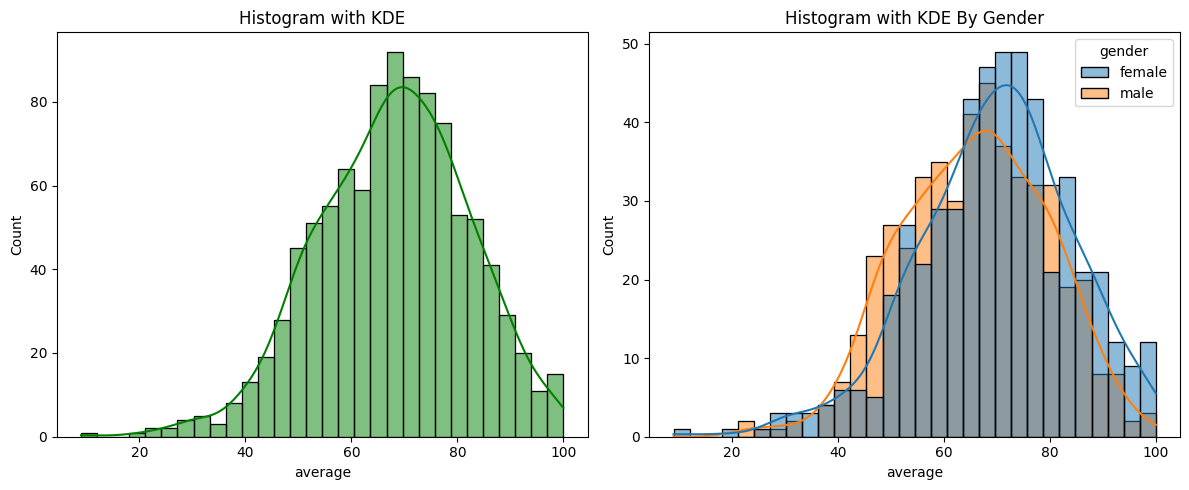

In [20]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first histogram with KDE
sns.histplot(data=df,x='average',bins=30,kde=True,color='g',ax=axes[0])
axes[0].set_title('Histogram with KDE')

# Plot the second histogram with KDE and hue
sns.histplot(data=df,x='average',bins=30,hue='gender',kde=True,color='g',ax=axes[1])
axes[1].set_title('Histogram with KDE By Gender')

# Adjust layout
plt.tight_layout()
plt.show()

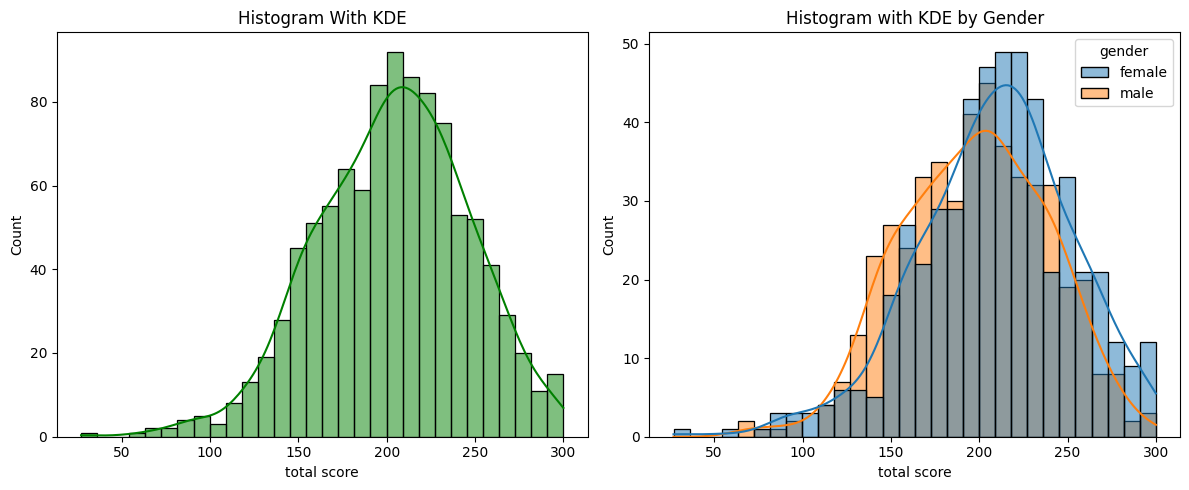

In [21]:
#create Subplot
fig,axes=plt.subplots(1, 2, figsize=(12,5))

#plot the first histogram with kde
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g',ax=axes[0])
axes[0].set_title("Histogram With KDE")

#plot the histogram with kde with hue parmeter gender
sns.histplot(data=df,x='total score',bins=30,kde=True,hue='gender',ax=axes[1])
axes[1].set_title("Histogram with KDE by Gender")

#Adjust the layout
plt.tight_layout()
plt.show()

Insights
* Female students tend to perform well than male students.

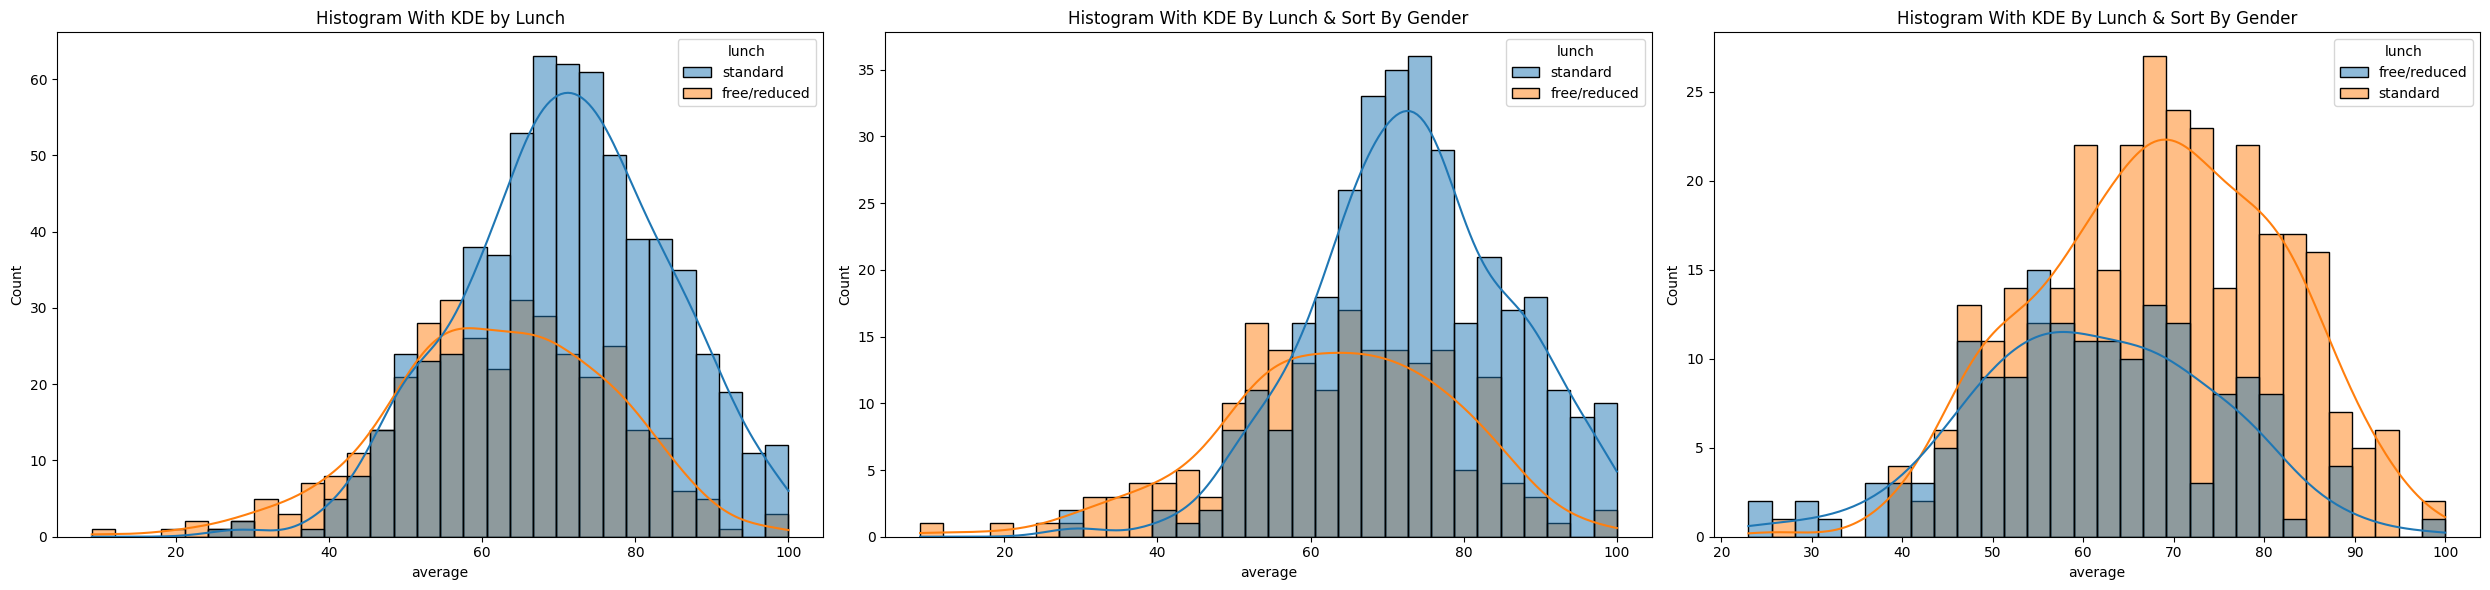

In [22]:
#create subplot
fig,axes=plt.subplots(1,3,figsize=(25,6))

#plot the histogram with KDE and hue parameter is lunch
sns.histplot(data=df,x='average',bins=30,kde=True,color='g',hue='lunch',ax=axes[0])
axes[0].set_title("Histogram With KDE by Lunch")

#plot histogram with kde and gender wise and hue parameter is lunch
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,color='g',hue='lunch',ax=axes[1])
axes[1].set_title("Histogram With KDE By Lunch & Sort By Gender")

#plot histogram with kde and gender wise and hue parameter is lunch
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='lunch',ax=axes[2])
axes[2].set_title("Histogram With KDE By Lunch & Sort By Gender")

#adjust the layout
plt.tight_layout()
plt.show()

Insights:
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it male or female.

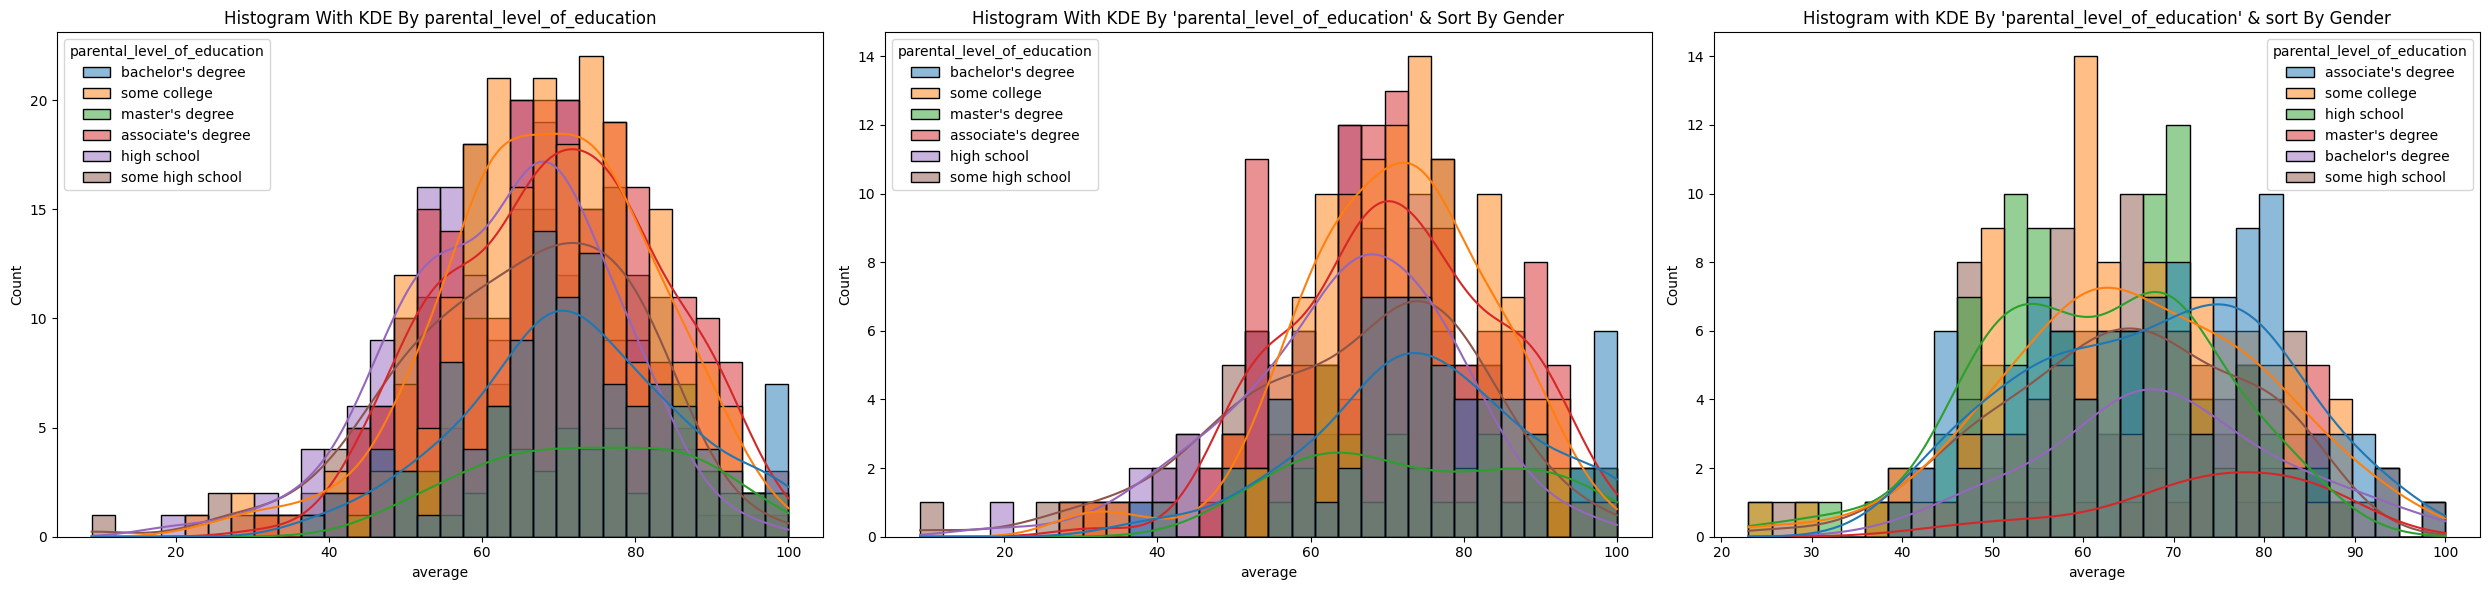

In [23]:
#create subplot
fig,axes=plt.subplots(1,3,figsize=(25,6))

#plot the histogram with KDE & Hue parameter is parental_level_of_education
sns.histplot(data=df,x='average',bins=30, kde=True,hue='parental_level_of_education',color='g',ax=axes[0])
axes[0].set_title("Histogram With KDE By parental_level_of_education")

#plot the histogram with KDE & Hue Parameter is parental_level_of_education & sort gender wise
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='parental_level_of_education',color='g',ax=axes[1])
axes[1].set_title("Histogram With KDE By 'parental_level_of_education' & Sort By Gender")

#plot the histogram iwth KDE & Hue paramter is parental_level_of_Education & sort gender wise
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='parental_level_of_education',color='g',ax=axes[2])
axes[2].set_title("Histogram with KDE By 'parental_level_of_education' & sort By Gender")

#Adjust the layout
plt.tight_layout()
plt.show()

Insights:

* In general parents education don't help student perform well in exam
* 2nd plot shows that there is no effect of parent's education on female students.
* 3rd plot shows that parents whose education is of associate's degree or master's degree their male child tend to perform well in exam

In [24]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


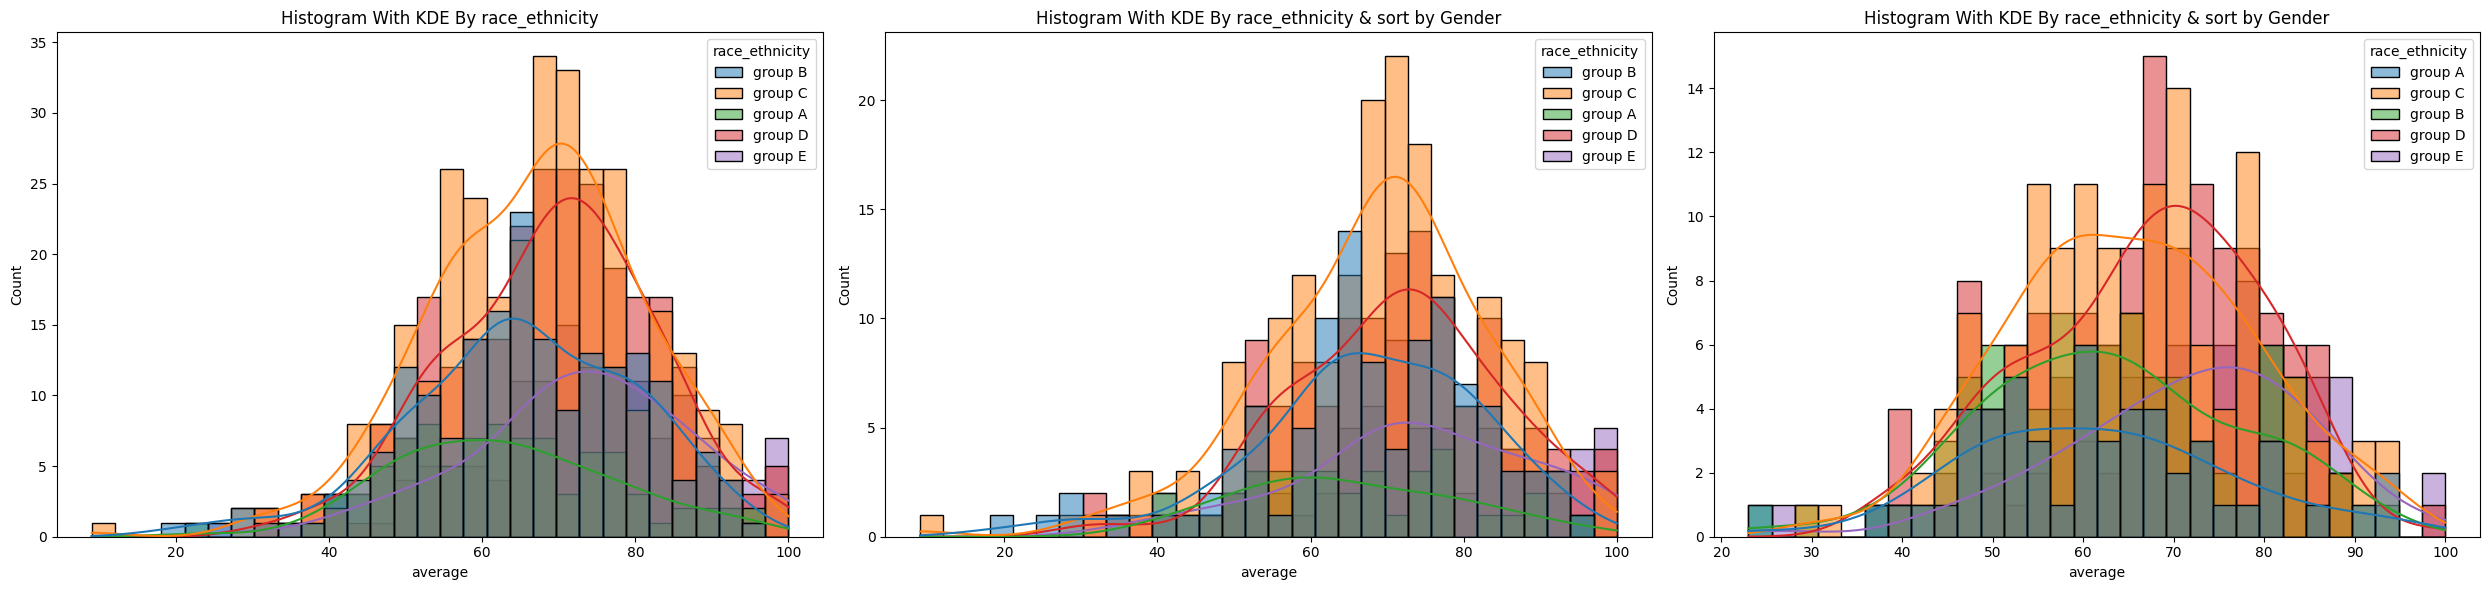

In [25]:
#Create the subplot
fig,axes=plt.subplots(1,3,figsize=(25,6))

# create the Histogram with KDE for race/ethnicity
sns.histplot(data=df,x='average',kde=True,bins=30,hue='race_ethnicity',color='g',ax=axes[0])
axes[0].set_title("Histogram With KDE By race_ethnicity")

#create the histogram with KDE for race/ethnicity
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,bins=30,hue='race_ethnicity',color='g',ax=axes[1])
axes[1].set_title("Histogram With KDE By race_ethnicity & sort by Gender")

#create the hsitogram with KDE for race/ethnicity
sns.histplot(data=df[df.gender=='male'],kde=True,bins=30,x='average',hue='race_ethnicity',ax=axes[2])
axes[2].set_title("Histogram With KDE By race_ethnicity & sort by Gender")

#Adjust the layout
plt.tight_layout()
plt.show()

Insights:
* students in group A ,B & E tends to perform poorly in exams.
* students in group C & group D tends to perform best in exams.
* Students in group A, B & E tends poor in Exams irrespective of whether they male or female.
* Students in group C & group D tends to perform best in exam irrespective of whether they male or female.

#### 4.2 Maximum score of students in all three subject

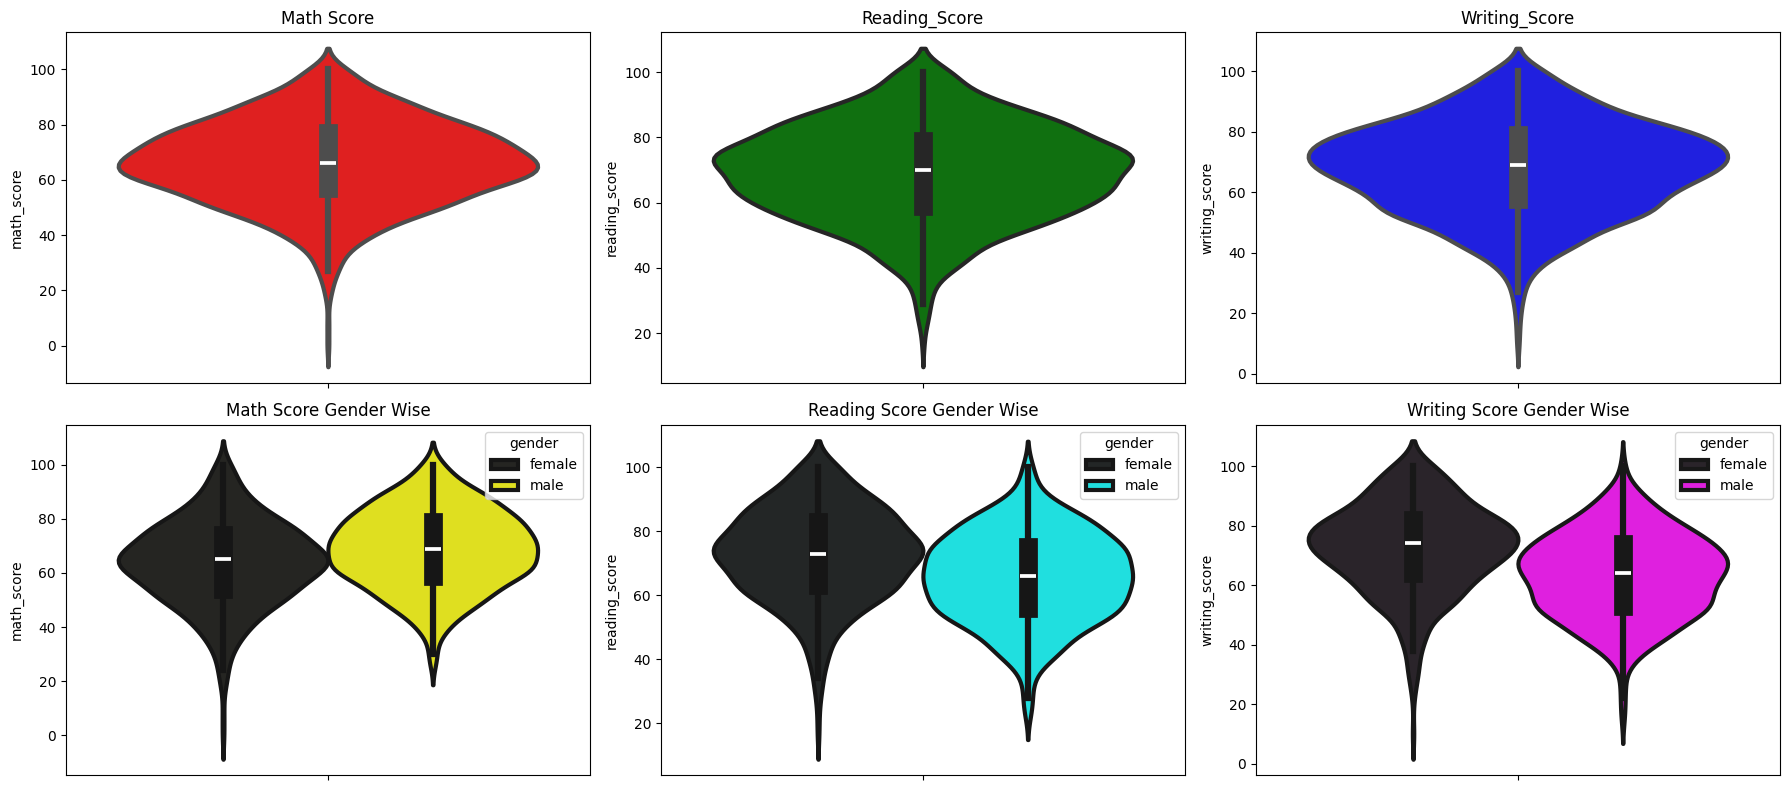

In [26]:
#create subplot
fig,axes=plt.subplots(2,3,figsize=(18,8))

#create violin plot for Math Subject
sns.violinplot(data=df,y='math_score',color='red',linewidth=3,ax=axes[0,0])
axes[0,0].set_title("Math Score")

sns.violinplot(data=df,y='math_score',hue='gender',color='yellow',linewidth=3,ax=axes[1,0])
axes[1,0].set_title("Math Score Gender Wise")

#create violin plot for Reading Subject
sns.violinplot(data=df,y='reading_score',color='green',linewidth=3,ax=axes[0,1])
axes[0,1].set_title("Reading_Score")

sns.violinplot(data=df,y='reading_score',hue='gender',color='cyan',linewidth=3,ax=axes[1,1])
axes[1,1].set_title("Reading Score Gender Wise")

#create voilin plot for Writing Subject
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3,ax=axes[0,2])
axes[0,2].set_title("Writing_Score")

sns.violinplot(data=df,y='writing_score',hue='gender',color='magenta',linewidth=3,ax=axes[1,2])
axes[1,2].set_title("Writing Score Gender Wise")

#Adjust the layout
plt.tight_layout()
plt.show()

Insight:
* From above graph it's clearly visible that most of students score in between 60-80 for math subject & for reading &writing subjects score is in between 50-80.
* From math gender wise plot it shows that most female students scored between 50-70 & male students scored between 60-80.
* From reading gender wise plot it shows that most female students scored between 60-80 & male students scored between 45-65.
* From Writing gender wise plot it shows that most female students scored between 70-80 & male students scored between 45-70.

#### 4.3 Multivariate analysis using pieplot

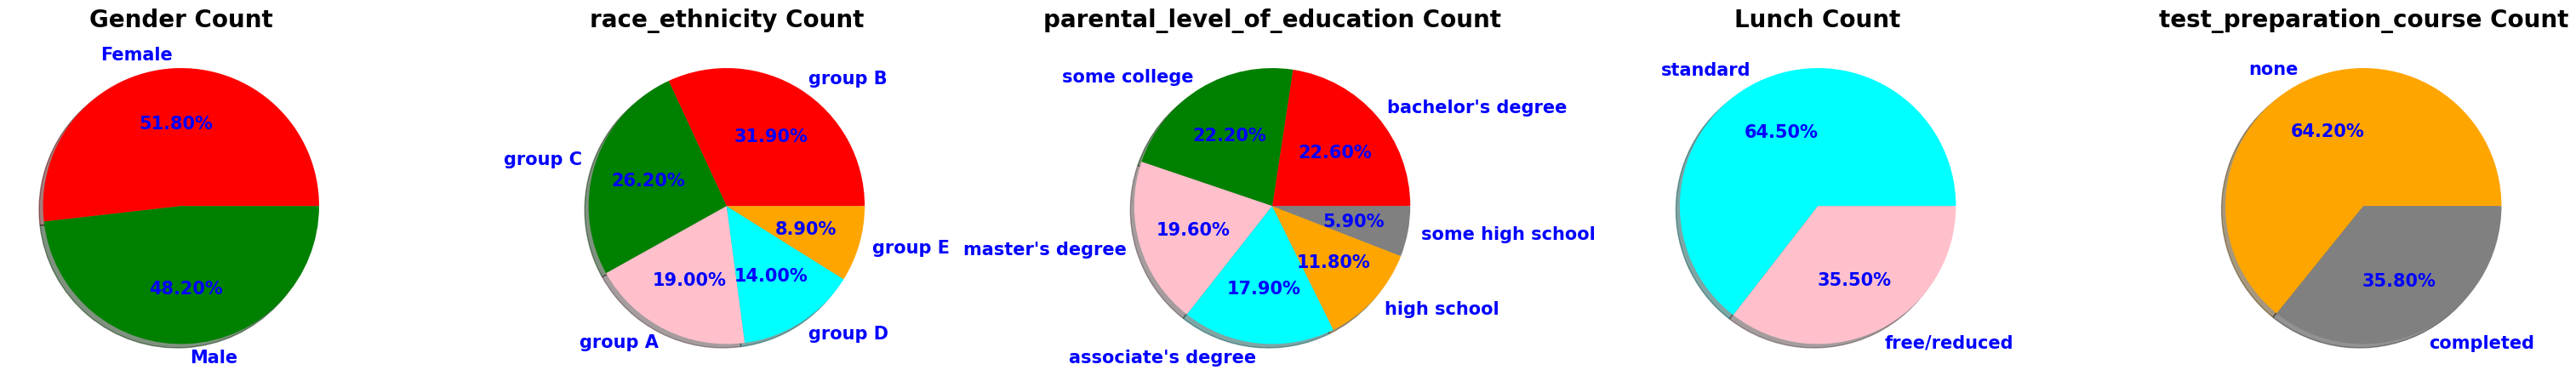

In [27]:
#create subplot
fig,axes=plt.subplots(1,5,figsize=(30,8))

#create pieplot gender wise
size_gender = df['gender'].value_counts()
label_gender = ['Female', 'Male']
color_gender = ['red', 'green']


axes[0].pie(size_gender,labels=label_gender,textprops={'fontsize':15,'color':'blue','fontweight':'bold'},colors=color_gender,autopct='%0.2f%%',shadow=True)
axes[0].set_title("Gender Count",fontsize=20,fontweight='bold')

#create pieplot race_ethinicty
size_race_ethnicity = df['race_ethnicity'].value_counts()
label_race_ethnicity = ['group B', 'group C', 'group A', 'group D', 'group E']
color_race_ethnicity = ['red', 'green', 'pink', 'cyan', 'orange']

axes[1].pie(size_race_ethnicity,labels=label_race_ethnicity,textprops={'fontsize':15,'color':'blue','fontweight':'bold'},colors=color_race_ethnicity,autopct='%0.2f%%',shadow=True)
axes[1].set_title("race_ethnicity Count",fontsize=20,fontweight='bold')

#create pipeplot parental_level_of_education
size_ple=df['parental_level_of_education'].value_counts()
label_ple=["bachelor's degree",'some college',"master's degree","associate's degree",'high school','some high school']
color_ple=['red', 'green', 'pink', 'cyan', 'orange','grey']

axes[2].pie(size_ple,labels=label_ple,textprops={'fontsize':15,'color':'blue','fontweight':'bold'},colors=color_ple,autopct='%0.2f%%',shadow=True)
axes[2].set_title("parental_level_of_education Count",fontsize=20,fontweight='bold')

#create pipeplot lunch
size_lunch=df['lunch'].value_counts()
label_lunch=['standard','free/reduced']
color_lunch=['cyan','pink']

axes[3].pie(size_lunch,labels=label_lunch,textprops={'fontsize':15,'color':'blue','fontweight':'bold'},colors=color_lunch,autopct="%0.2f%%",shadow=True)
axes[3].set_title("Lunch Count",fontsize=20,fontweight='bold')

#create pieplot test_preparation_course
size_tpc=df['test_preparation_course'].value_counts()
label_tpc=['none','completed']
color_tpc=['orange','grey']

axes[4].pie(size_tpc,labels=label_tpc,textprops={'fontsize':15,'color':'blue','fontweight':'bold'},colors=color_tpc,autopct="%0.2f%%",shadow=True)
axes[4].set_title("test_preparation_course Count",fontsize=20,fontweight='bold')
#Adjust the layout
plt.tight_layout()
plt.show()

Insight:
* From Gender count it look like male & female count is almost euqal.
* From race_ethnicity count we found that group B is highest number of count.
* From parental_level_of_education we get that Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
* From Lunch count we get information that standard lunch is eaten by most of the students.
* In last test_preparation_course complete count is very very low.

In [28]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN
* How is distribution is Gender?
* Is gender has any impact on student's performance?


##### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

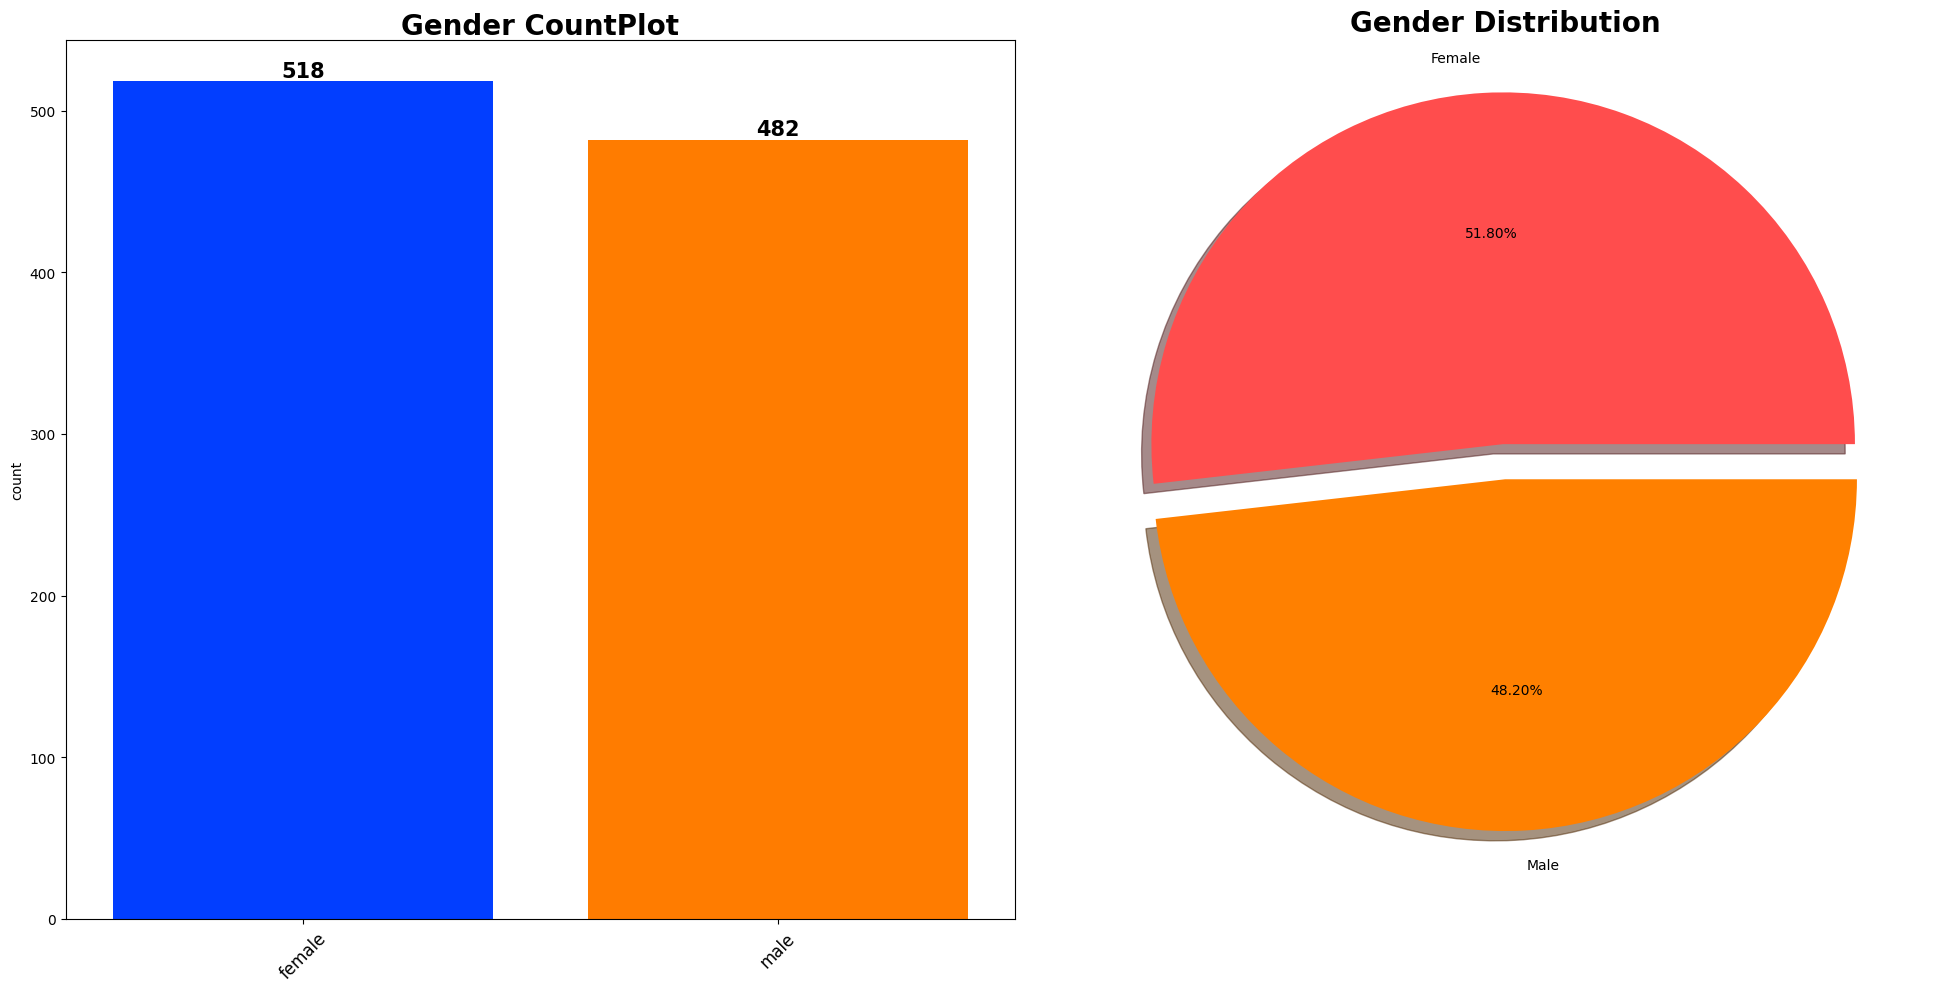

In [29]:
#create count plot & pieplot for gender
fig ,axes=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['gender'],data=df,palette='bright',ax=axes[0],saturation=1)
#add bar labels to the count plot
for container in axes[0].containers:
    axes[0].bar_label(container,fmt='%d',color='Black',fontsize=15,label_type='edge',weight='bold')

axes[0].xaxis.set_label_position('top') # Place x-label at the top
axes[0].set_xlabel("Gender CountPlot",fontsize=20,fontweight='bold')  # Add xlabel to count plot
axes[0].set_xticklabels(df['gender'].unique(), fontsize=12, rotation=45) # add ticks to count plot on x axis

axes[1].pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0.1,0.0],autopct="%0.2f%%",shadow=True,colors=['#ff4d4d','#ff8000'])
axes[1].set_title("Gender Distribution",fontsize=20,fontweight='bold')  # Add title to pie chart

#adjust the layout
plt.tight_layout()
plt.show()

Insight:
* Gender has balanced data with female students are 518 (51.80%) and male students are 482 (48.20%)

##### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [30]:
# Exclude non-numeric columns before grouping
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
gender_group = df.groupby('gender')[numeric_columns].mean()
gender_group 

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


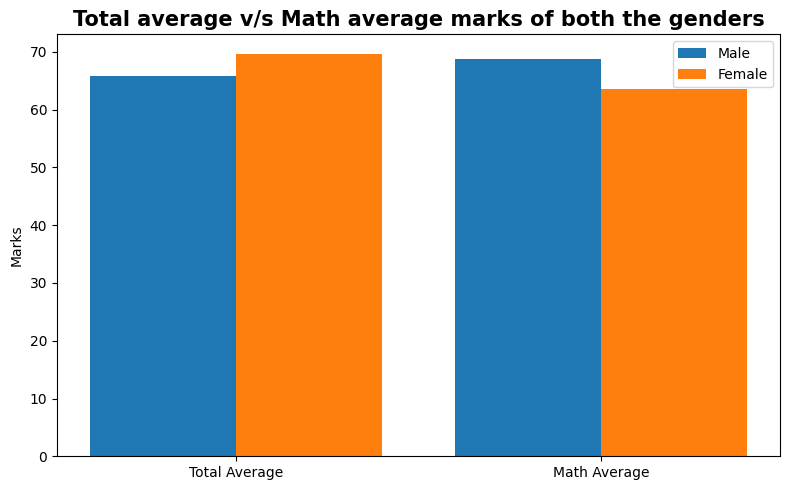

In [31]:
#create figure with custome size
plt.figure(figsize=(8,5))

X=['Total Average','Math Average']

female_scores=[gender_group['average'][0],gender_group['math_score'][0]]
male_scores=[gender_group['average'][1],gender_group['math_score'][1]]

X_axis=np.arange(len(X))

#Create Bar plot for female & male score
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")

plt.title("Total average v/s Math average marks of both the genders",fontsize=15,fontweight='bold')

plt.legend()

#show the layout
plt.tight_layout()
plt.show()

Insight:
* On average Female studnts scores overall greate score than men.
* Where male students perform well in math subject than female.

#### 4.4.2 RACE/EHNICITY COLUMN
* How is group wise distribution?
* Is race/ethnicity has any impact on student's performance?

##### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

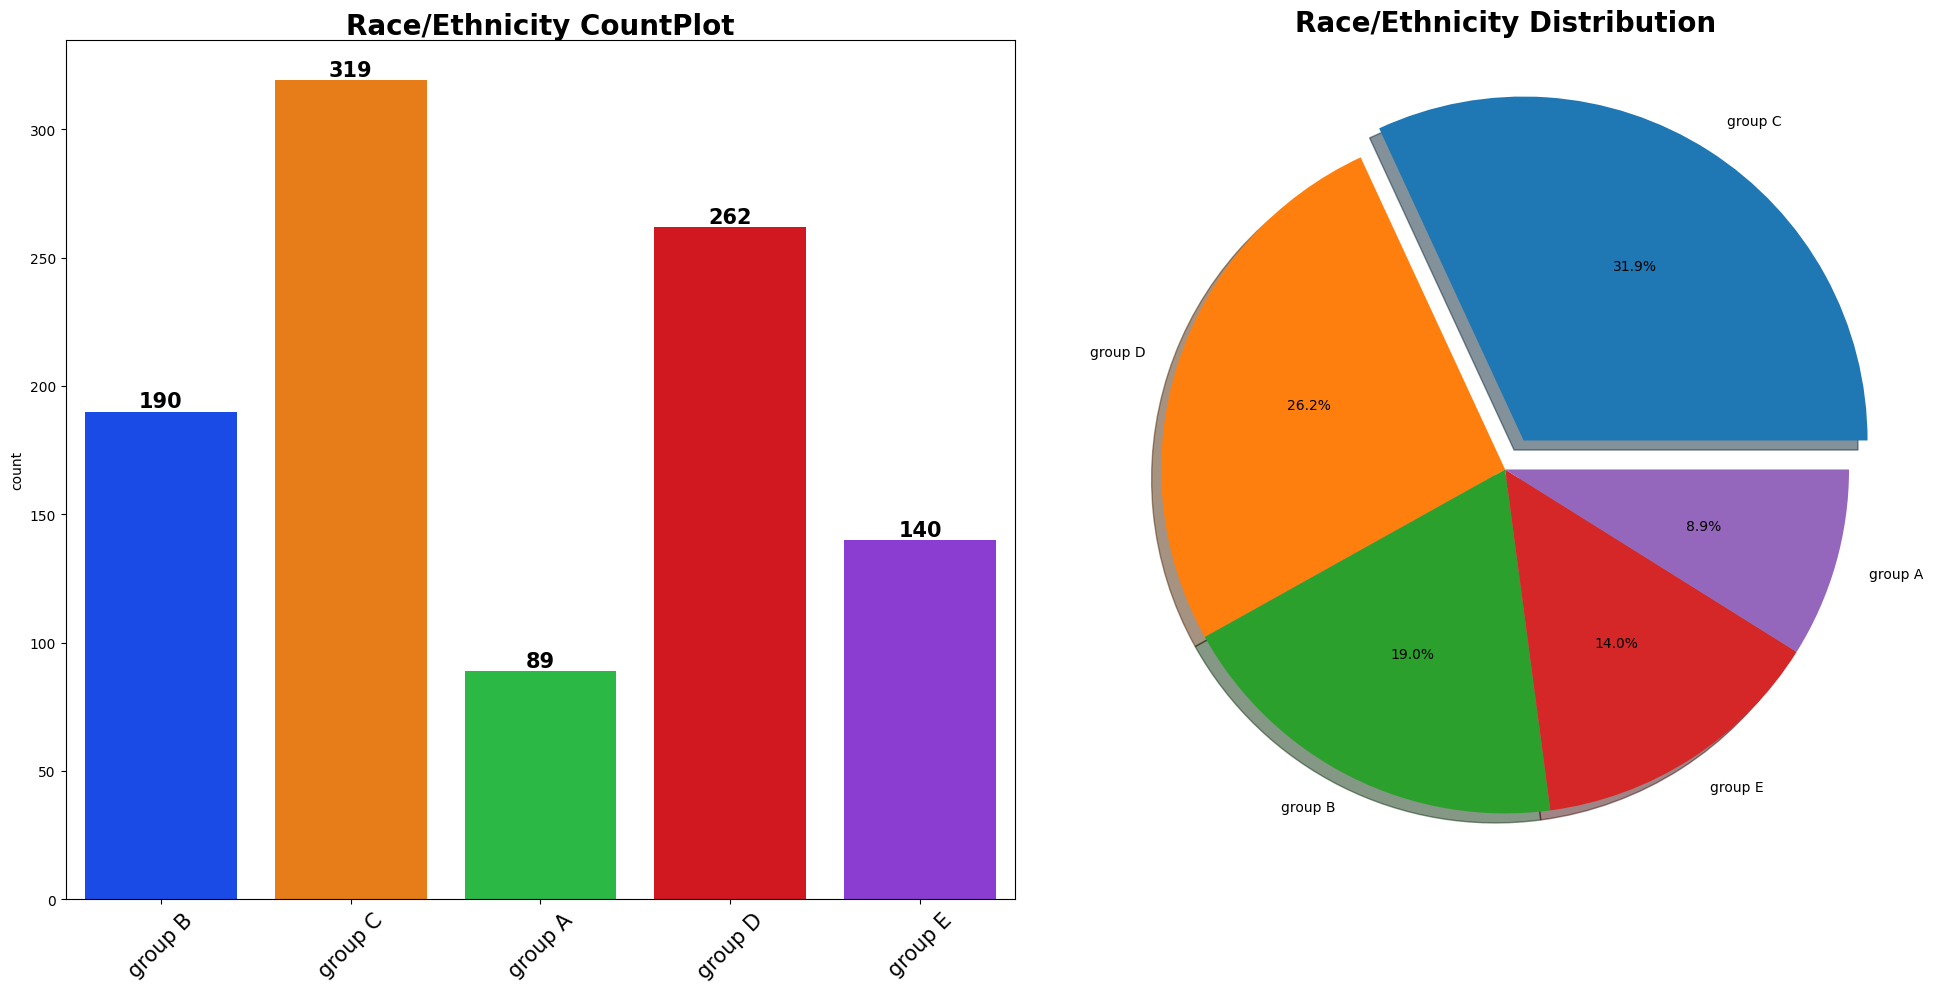

In [32]:
#create count plot  & pieplot for race/ethnicity
fig,axes=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=axes[0],saturation=0.8)
#add labels for bars in the plot
for container in axes[0].containers:
    axes[0].bar_label(container,fmt='%d',color='black',fontsize=15,fontweight='bold',label_type='edge')

axes[0].xaxis.set_label_position('top') #place the x-label at top
axes[0].set_xlabel("Race/Ethnicity CountPlot",fontsize=20,fontweight='bold') # add x label at top
axes[0].set_xticklabels(df['race_ethnicity'].unique(),fontsize=15,rotation=45) #add ticks to count plot on X axis

#creating pie charts
axes[1].pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
axes[1].set_title("Race/Ethnicity Distribution",fontsize=20,fontweight='bold') #add title to pie chart

#adjust the layout
plt.tight_layout()
plt.show()

Insight:
* In group A has the lowest students
* In group B and D has almost highest count of students.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [37]:
group_race_ethnicity=df.groupby('race_ethnicity')
group_race_ethnicity.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
11,male,group D,associate's degree,standard,none,40,52,43,135,45.000000
13,male,group A,some college,standard,completed,78,72,70,220,73.333333
32,female,group E,master's degree,free/reduced,none,56,72,65,193,64.333333
34,male,group E,some college,standard,none,97,87,82,266,88.666667
